# Lecture 1: Regression

## Warning: make sure you run the cells in the correct order

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [2, 2] # inches
mpl.rcParams['font.size'] = 8

# Define a function to do the most common plotting task
def xyplot(x1=None, y1=None, x2=None, y2=None, x3=None, y3=None, title=None, fname=None):
    plt.figure()
    if x1 is not None and y1 is not None:
        plt.plot(x1,y1,'b.')
    if x2 is not None and y2 is not None:
        plt.plot(x2,y2,'k-')
    if x3 is not None and y3 is not None:
        plt.plot(x3,y3,'r-')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.tight_layout()
    if fname:
        plt.savefig(fname)

First, we create a simple linear model with some noise added. We plot the underlying trend (black line) and also the data points (blue). The random seed is set explicitly so that the graph can be reproduced.

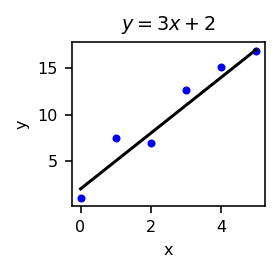

In [5]:
# model is y = 3x+2
np.random.seed(123123)
x = np.array([0, 1, 2, 3, 4, 5])
y = 3*x+2
# Add the noise
t = y + 5*(np.random.rand(6)-0.5)
xyplot(x,t,x2=x,y2=y,title=r'$y=3x+2$',fname='simple-linear.pdf')

It's also instructive to visualise the residual errors:

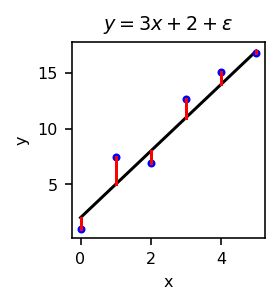

In [6]:
plt.plot(x,y,'k-')
plt.plot(x,t,'b.')
for i,j in enumerate(x):
    plt.plot([j,j],[y[i],t[i]],'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.title(r'$y=3x+2+\epsilon$')
plt.savefig('simple-linear-residuals.pdf',)

Now we do a naive fit of different degree of polynomial to the data, using the normal equations
$$\mathbf{\Phi}^\mathrm{T}\mathbf{\Phi}\mathbf{w} = \mathbf{\Phi}^\mathrm{T}\mathbf{y}$$
where $\mathbf{\Phi}_{ij} = \phi_j(x_i)$, basis function $\phi_j$ evaluated at data point $x_i$.

For a linear fit, we are using the model $f(x) = w_0 + w_1 x$ and the basis set is $\{1, x\}$

In [7]:
Phi = np.array([np.ones(x.shape), x]).T
print(Phi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [8]:
# Weights
w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),y))
print('Model weights:')
print(w)
# The least-squares error
residual = y - np.matmul(Phi, w)
lse = np.matmul(residual.transpose(), residual)
print('Least-squares error: ' + str(lse))

Model weights:
[2. 3.]
Least-squares error: 0.0


Exactly as we expect.
Let's now repeat for the data with added noise. Here, we will calculate the residual least-squares error of the fit against both the noisy data, and also against the underlying trend.

Model weights:
[2.30895575 3.07615097]
Least-squares error vs data: 10.60472700753959
Least-squares error vs trend: 1.5974837488416596


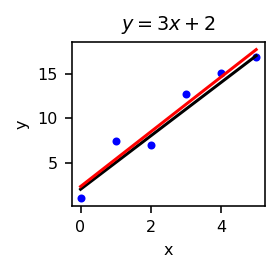

In [9]:
w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),t))
print('Model weights:')
print(w)
# The least-squares error vs the data
residual = t - np.matmul(Phi, w)
lse = np.matmul(residual.transpose(), residual)
print('Least-squares error vs data: ' + str(lse))
# The least-squares error vs the true trend
residual = y - np.matmul(Phi, w)
lse = np.matmul(residual.transpose(), residual)
print('Least-squares error vs trend: ' + str(lse))
xyplot(x,t,x2=x,y2=y,x3=x,y3=np.matmul(Phi,w),title=r'$y=3x+2$',fname='simple-linear-noisy-fitted.pdf')

The fitted curve (red line) is not quite the same as the underlying trend (black line), but it is not far away. The least squares error indicates that the fitted line is closer to the true trend than it is to the noisy data. We can therefore conclude that we have successfully found a good approximation to the underlying data-generating process.

Let us now imagine that we don't know what the underlying function is. One obvious things to try is to simply use a very powerful and flexible model. For instance, we could use
$$f(x) = \sum_{i=1}^{i=7} w_i x^i$$
which contains within it the terms necessary to fit this dataset.

In [7]:
Phi = np.array([pow(x, i) for i in range(8)]).T
print(Phi)

[[    1     0     0     0     0     0     0     0]
 [    1     1     1     1     1     1     1     1]
 [    1     2     4     8    16    32    64   128]
 [    1     3     9    27    81   243   729  2187]
 [    1     4    16    64   256  1024  4096 16384]
 [    1     5    25   125   625  3125 15625 78125]]


In [8]:
w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),y))
print('Model weights:')
print(w)
# The least-squares error vs the data
residual = y - np.matmul(Phi, w)
lse = np.matmul(residual.transpose(), residual)
print('Least-squares error vs data: ' + str(lse))
# The least-squares error vs the true trend
residual = y - np.matmul(Phi, w)
lse = np.matmul(residual.transpose(), residual)
print('Least-squares error vs trend: ' + str(lse))
print('Least-squares error: ' + str(lse))

Model weights:
[ 2.00000000e+00  2.88178458e+00  2.47858648e-01 -1.71268587e-01
  4.23611089e-02  8.53558123e-04 -1.77319254e-03  1.83888071e-04]
Least-squares error vs data: 1.41569766911868e-25
Least-squares error vs trend: 1.41569766911868e-25
Least-squares error: 1.41569766911868e-25


The numbers are not quite right here - the coefficient $w_1$ is nearly but not quite equal to 3, and some of the higher order terms have non-zero coefficients. Let's plot the results. Note that we use a "high resolution" set of x-values for the fitted curve so that we can see how the result behaves away from the data given to the algorithm.

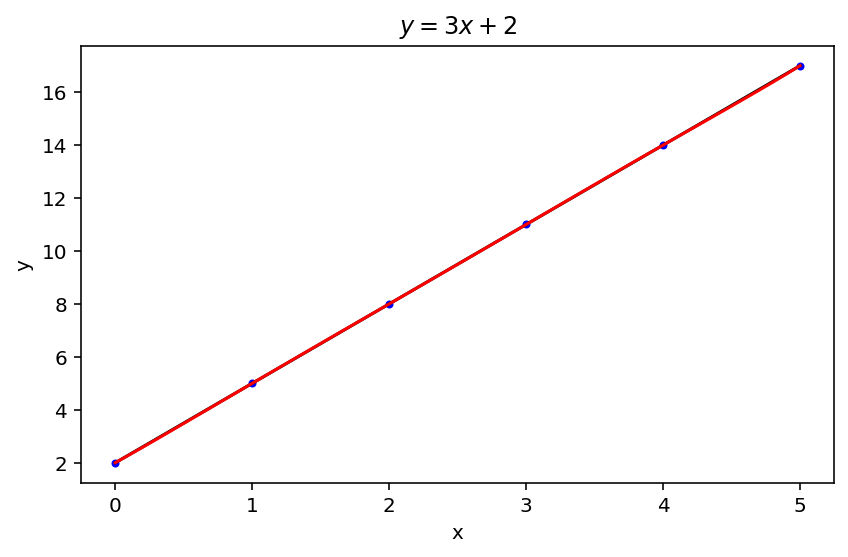

In [9]:
xHigh = np.linspace(0,5,51)
PhiHigh = np.array([pow(xHigh, i) for i in range(8)]).T
xyplot(x,y,x2=x,y2=y,x3=xHigh,y3=np.matmul(PhiHigh,w),title=r'$y=3x+2$',fname='simple-linear-overfitted.pdf')

This is as we would hope. Let us now try this for the noisy data

Model weights:
[ 1.00097364e+00  2.38566064e+01 -2.74063776e+01  1.11924682e+01
 -8.52382077e-01 -3.92259526e-01  7.73530176e-02 -3.42349824e-03]
Least-squares error vs data: 1.3717324868042742e-21
Least-squares error vs trend: 12.202210756165234


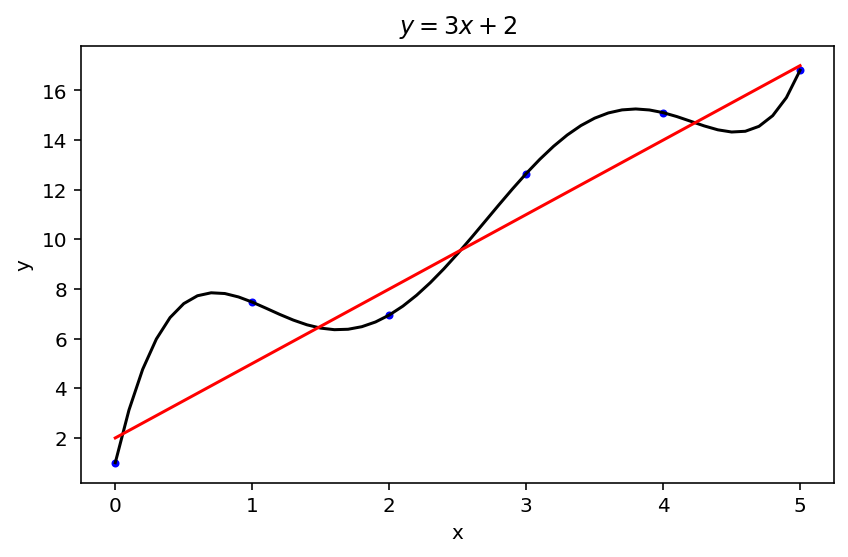

In [10]:
w = np.linalg.solve(np.matmul(Phi.transpose(),Phi), np.matmul(Phi.transpose(),t))
print('Model weights:')
print(w)
# The least-squares error vs the data
residual = t - np.matmul(Phi, w)
lse = np.matmul(residual.transpose(), residual)
print('Least-squares error vs data: ' + str(lse))
# The least-squares error vs the true trend
residual = y - np.matmul(Phi, w)
lse = np.matmul(residual.transpose(), residual)
print('Least-squares error vs trend: ' + str(lse))
xyplot(x,t,x2=xHigh,y2=np.matmul(PhiHigh,w),x3=x,y3=y,title=r'$y=3x+2$',fname='simple-linear-noisy-overfitted.pdf')


This is not what we want at all. As we can see from both the plot and the least-squares errors, we have fitted the noisy data exactly rather than finding the underlying trend. The high-order polynomial model has sufficient capacity to model the noise in the data. This is known as \textit{overfitting} and how to oversome this is a major topic of research in machine learning. We will next study some of these methods